# Лабораторная работа 8
### Тылецкого Павла
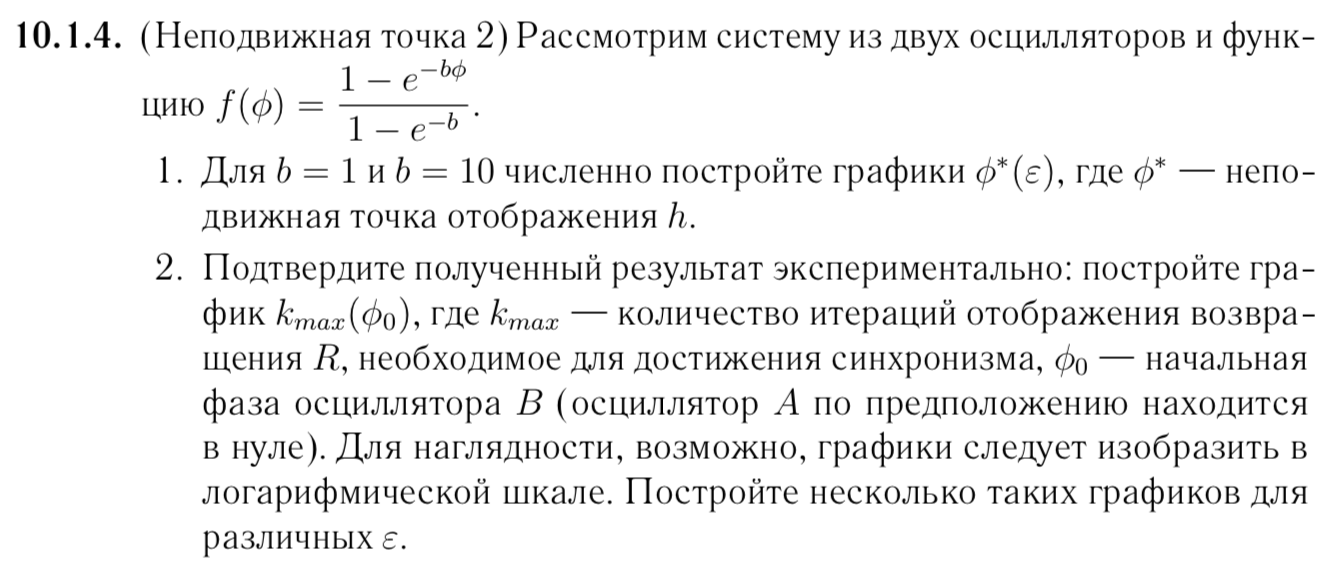

Найдем функцим g и h, а так же неподвижную точку $\phi^*(\epsilon)$

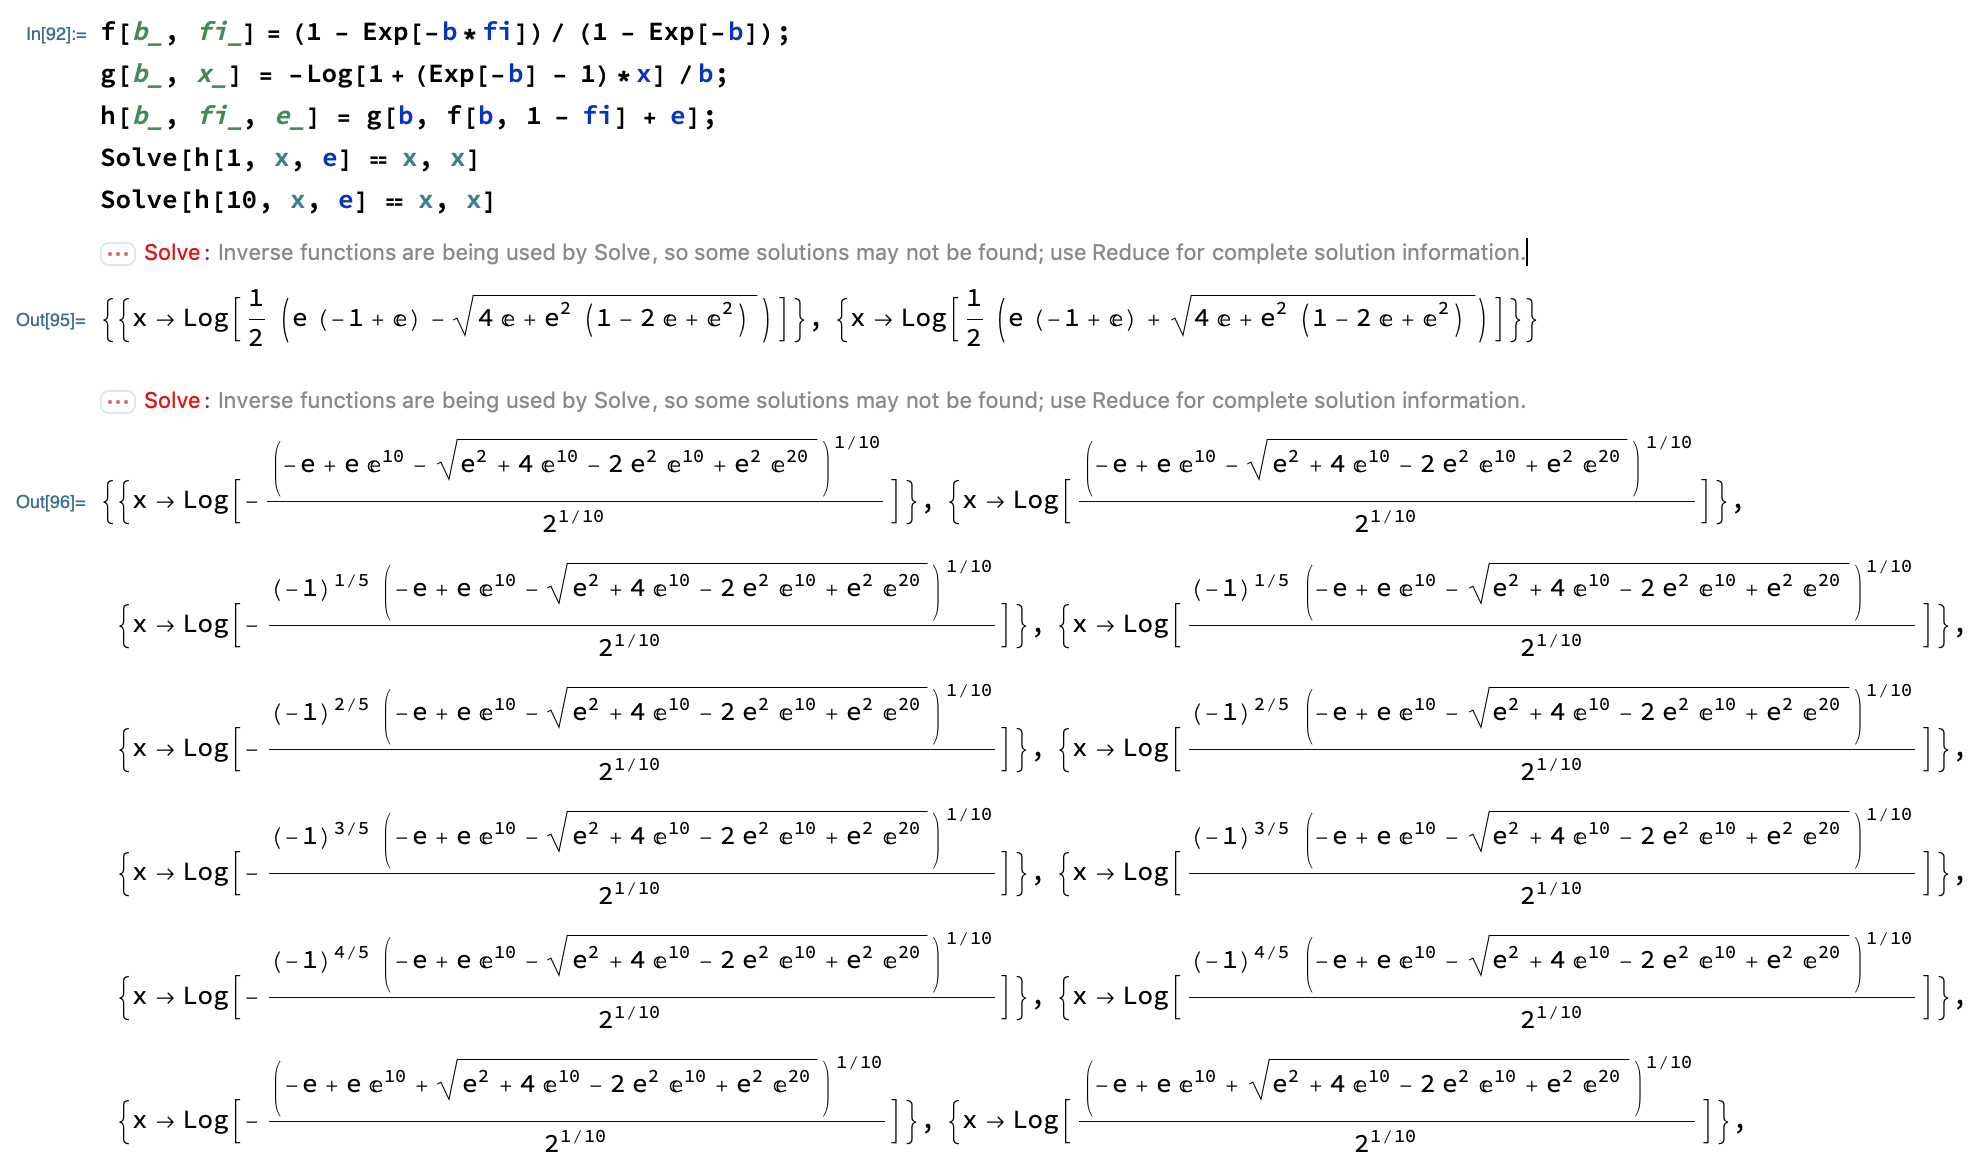

График для b=1
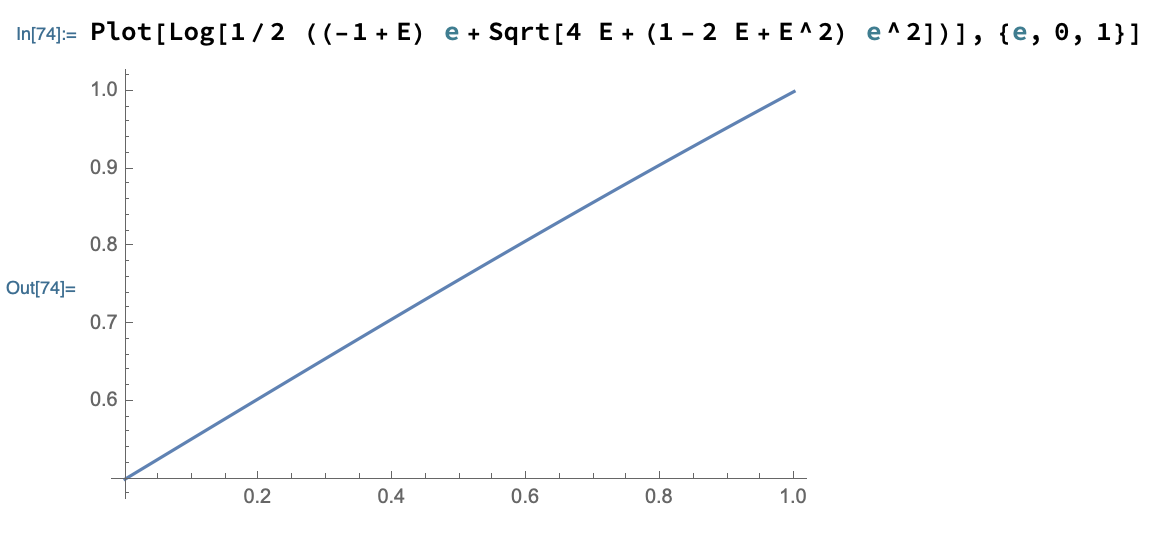

и для b=10
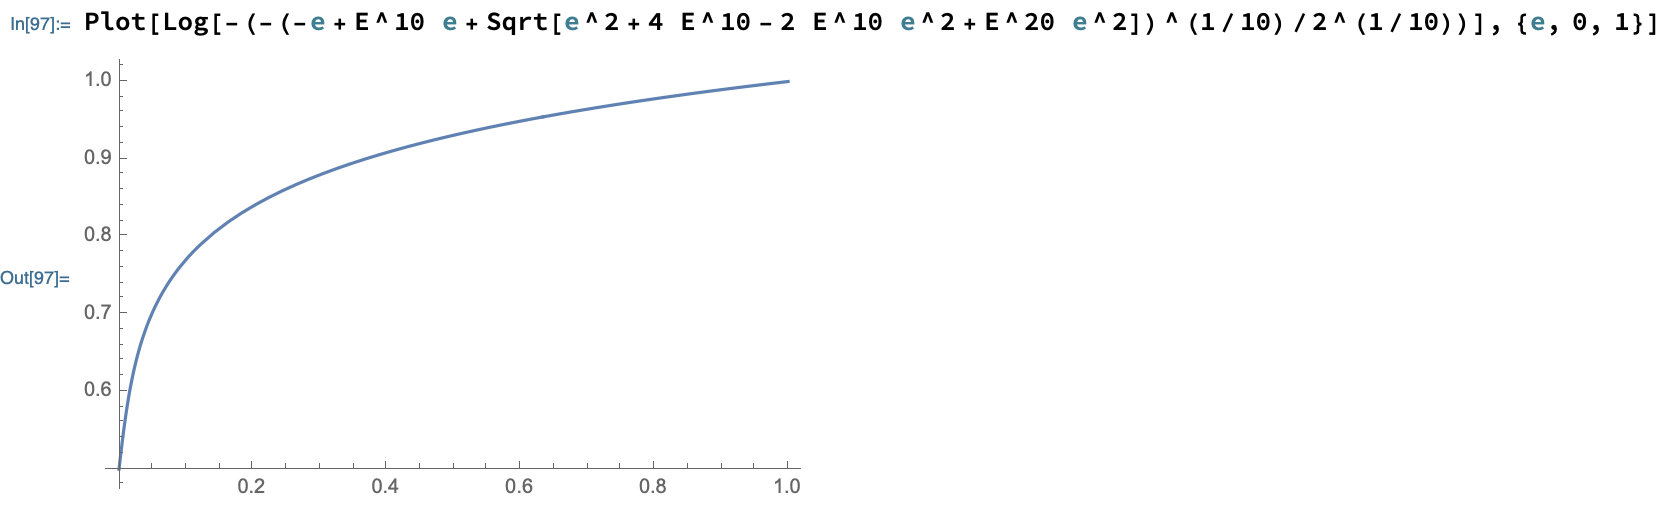

Построим график количества итераций отображения возвращения R, необходимого для достижения синхронизма в зависимости от начальной координаты второй точки

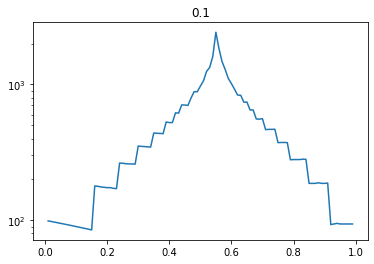

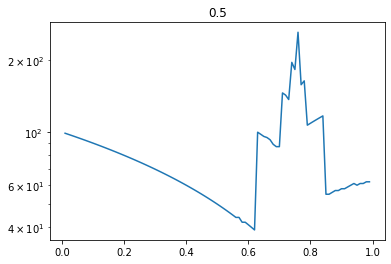

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


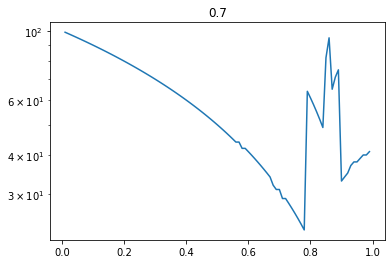

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def f(b, fi):
    return (1 - np.exp(-b * fi)) / (1 - np.exp(-b))

def g(b, x):
    return - np.log(1 + (np.exp(-b) - 1) * x) / b

def find_sync_iteration(starting_points, b, eps, delta):
    points = starting_points
    i = 0
    while points[0] != points[1]:
        points = points + min(delta, np.min(1 - points))
        values = f(b, points)
        values = values + eps * (values >= 1).sum()
        points = g(b, values)
        points[values >= 1] = 0
        i += 1
    return i

for e in [0.1, 0.5, 0.7]:
    fis = np.arange(0.01, 1, 0.01)
    plt.plot(fis, [find_sync_iteration(np.array([0, fi]), 1, e, 0.01) for fi in fis])
    plt.title(e)
    plt.yscale('log')
    plt.show()